![Palace of Culture and Science](josh-hild-kLaOHFZgZCg-unsplash_s.jpg)

*Photo by
[Josh Hild](https://unsplash.com/@joshhild?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText)
on
[Unsplash](https://unsplash.com/collections/9563576/warsaw?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText)*

## IBM Data Science on Coursera
This notebook contains my capstone project submission for the IBM Data Science course available on Coursera.
# Housing Development Market in Warsaw, Poland — Analysis.

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## 1. Introduction <a name='introduction'></a>

Warsaw is the capital of Poland, and with **~1,8 million** citizens, the most populous city in the country. The population density is **3 448** per square kilometre, and it is divided into **18** districts.  
In the past several years the city has been undergoing rapid development, quickly increasing its housing capacity - growing at the rate of **2-2,5%** every year since 2016, with the total number of dwellings expected to surpass **1 million**, and the total dwelling area of **60 million** square meters in year 2020. With well in excess of **20 thousand** new apartments and houses to choose from each year, picking the right one can overwhelm any prospective homeowner. Consider the staggering rate at which prices increase - up to **6,81%** in 2018 - and the pressure becomes that much more evident.[^1]  
This analysis aims to alleviate some of the concerns and answer some of the most basic questions a person faced with purchasing an apartment might have. It will look at all the 18 districts and more than 200 developments currently on sale in the city, compare and segment them, and map the results trying to pinpoint the most and least attractive areas, as well as highlight their most and least desirable characteristics. 

## 2. Data <a name='data'></a>

The data used in the analysis comes form several sources:
- **Statistical Office in Warsaw**[^1], containing statistical information about the individual districts. Some of the metrics that will be considered for evaluation include:
    - crime rates,
    - unemployment rates,
    - cycle paths length,
    - dwellings numbers,
    - new dwellings constructed,
    - available nursery space,
    - medical practises,
    - pharmacies,
    - cinema seats,
    - sports clubs,
    - average dwellings prices,
- **Developers' websites** - manually collected data on the exact location of each development.
- **Forsquare**[^2] - data on numbers and types of businesses in each city district.
- **Warsaw Public Transport Coverage**[^3] - access to different means of public transport. Manually collected data on availability of:
    - metro stations,
    - train stations,
    - other public transport (tram, bus),
- **jakdojade.pl**[^4] - public transport commute time to the city centre from each of the developments (the time it takes to get from a development to the "Centrum" stop on a weekday with arrival time set to 09:00AM and the routing mode set to "optimal".
- **Geospatial data on Warsaw's administrative division**[^5] - provided by the user *andilabs* on GitHub.

The above data will be used to extract the most meaningful features describing both the districts and developments. The developments will be assigned to respective districts based on their location and the districts boundaries provided by the geospatial data. Things like access to public transportation, distance from the city centre, average dwelling prices, vicinity of services, and others will be used to group districts/developments, and identify the most desirable locations.

## 3. Methodology <a name='methodology'></a>

### Districts - data
First the available statistical data on city districts is imported:

In [1]:
import pandas as pd

In [2]:
districts = pd.read_csv('Districts.csv')
districts

district  crimes_per100pop  unemployment_rate  \
0           Bemowo            1.7710             0.0087   
1        Białołęka            1.8744             0.0081   
2          Bielany            2.1365             0.0118   
3          Mokotów            2.3395             0.0103   
4           Ochota            3.2153             0.0107   
5   Praga-Południe            2.5277             0.0132   
6     Praga-Północ            4.6569             0.0177   
7        Rembertów            1.2894             0.0121   
8      Śródmieście            8.1719             0.0120   
9         Targówek            1.6925             0.0113   
10           Ursus            1.3094             0.0102   
11         Ursynów            1.5587             0.0071   
12           Wawer            1.5725             0.0110   
13          Wesoła            1.5731             0.0095   
14         Wilanów            1.4296             0.0064   
15          Włochy            3.2369             0.0106   
16            Wola            3.2654             0.0148   
17        Żoliborz            2.0133             0.0098   

    cycle_paths_per_road_area  dwelling_per10pop  new_dwellings_per100pop  \
0                      0.0943             4.8511                   1.1882   
1                      0.0582             5.1552                   3.3212   
2                      0.1254             5.2843                   0.5135   
3                      0.0969             6.0050                   1.0713   
4                      0.1400             5.9401                   0.5904   
5                      0.1074             5.7138                   1.7345   
6                      0.1231             5.4301                   0.4674   
7                      0.0389             4.2326                   0.5786   
8                      0.1624             6.6381                   0.1033   
9                      0.0883             4.8167                   1.4545   
10                     0.1272             4.8685                   1.7067   
11                     0.1049             4.8060                   0.4465   
12                     0.0423             4.2958                   0.8542   
13                     0.0618             3.6892                   0.7886   
14                     0.1081             6.1990                   2.4094   
15                     0.0611             5.7737                   2.5493   
16                     0.0951             6.7308                   2.7452   
17                     0.1283             6.4078                   1.0781   

    children_per100nursery_places  surgeries_per1000pop  \
0                            91.0                0.3576   
1                            80.0                0.3535   
2                            93.0                0.5081   
3                            90.0                0.9292   
4                            91.0                1.1591   
5                            94.0                0.7150   
6                            98.0                0.7919   
7                            82.0                0.3306   
8                            93.0                1.7647   
9                            91.0                0.4679   
10                           87.0                0.5533   
11                           88.0                0.7907   
12                           83.0                0.5877   
13                           80.0                0.6340   
14                           81.0                0.9048   
15                           85.0                0.4962   
16                           90.0                1.0120   
17                           94.0                0.9467   

    pharmacies_per10000pop  libraries_per10000pop  cinema_seats_per100pop  \
0                   2.5195                 0.5689                  1.9384   
1                   2.5485                 0.5755                  1.9426   
2                   2.7303                 0.9859                  0.00

For convenience a separate object with districts' names, and values for the metrics are created, with an accompanying dictionary containing categories' descriptions:

In [3]:
district_names = districts.values[:,0]
district_values = districts.iloc[:, 1:]

categories_descriptions = {'crimes_per100pop':'Crimes per 100 Population',
                           'unemployment_rate':'Unemployment Rate',
                           'cycle_paths_per_road_area':'Cycle Paths Lenght per Roads Area',
                           'dwelling_per10pop':'Dwellings per 10 Population',
                           'new_dwellings_per100pop':'New Dwellings per 100 population',
                           'children_per100nursery_places':'Children per 100 Nursery Places',
                           'surgeries_per1000pop':'Medical Practises per 1000 Population',
                           'pharmacies_per10000pop':'Pharmacies per 10000 Population',
                           'libraries_per10000pop':'Libraries per 10000 Population',
                           'cinema_seats_per100pop':'Cinema Seats per 10 Population',
                           'sports_clubs_per10000pop':'Sports Clubs per 10000 Population',
                           'avg_dwelling_price10k_per_m2':'Average Dwelling Price 10k per m^2',
                          }

Next information on the geographical shape and location of each district is loaded, a dictionary with shapes of all the districts, and with centroids of all the districts are created:

In [4]:
import geopandas as gpd
import json
from shapely.geometry import Point, Polygon

In [5]:
districts_geo = gpd.read_file('warszawa-dzielnice.geojson')
districts_polygons = {}
districts_centroids = {}

for district in district_names:
    district_geometry = districts_geo.loc[districts_geo['name'] == district, 'geometry'].to_json()
    district_geometry = json.loads(district_geometry)
    district_geometry = district_geometry['features'][0]['geometry']['coordinates'][0][0]
    district_polygon = Polygon(district_geometry)
    district_centroid = district_polygon.centroid
    districts_polygons[district] = district_polygon
    districts_centroids[district] = district_centroid

### Developments - data
Next data on the developments is imported:

In [6]:
developments = pd.read_csv('Developments.csv')
developments

development                        address  longitude  \
0      19. Dzielnica / Etap IV                ul. Kolejowa 49  20.980202   
1             Aleja Słowiańska              Al. Słowiańska 25  20.965545   
2      Aleje przy Czereśniowej  Aleje Jerozolimskie 198R-198S  20.928252   
3                  Aluzyjna 19                ul. Aluzyjna 19  20.943133   
4        Apartamenty Bokserska               ul. Bokserska 56  20.994545   
..                         ...                            ...        ...   
253               Ziemowita 4a        ul. Księcia Ziemowita 4  21.061233   
254                   Złota 44                   ul. Złota 44  21.002372   
255       Żoliborz Artystyczny         pl. Czesława Niemena 1  20.969677   
256  Żoliborz Business Concept   ul. Powązkowska/Krasińskiego  20.961935   
257               Zwoleńska 90               ul. Zwoleńska 90  21.151935   

      latitude  metro  train bus_tram  time_to_city_centre  
0    52.226219   1000   1000       no                   18  
1    52.275543    500   3000      yes                   19  
2    52.199298   3000   3000       no                   32  
3    52.346246   3000   3000      yes                   47  
4    52.170751   3000   3000      yes                   32  
..         ...    ...    ...      ...                  ...  
253  52.262664   3000   3000      yes                   28  
254  52.231042    500    500      yes                    6  
255  52.258579   3000    500      yes                   29  
256  52.259692   3000   1000      yes                   25  
257  52.201150   3000   3000      yes                   45  

[258 rows x 8 columns]

The descriptions of categories in use stored in 'categories_descriptions' are updated with new categories from the developments data:

In [7]:
developments_categories_descriptions = {'metro':'Access to the Metro Network (3000=none)',
                                        'train':'Access to Train Stations (3000=none)',
                                        'bus_tram':'Access to any Bus or Tram stop',
                                        'time_to_city_centre':'Average Time a Commute ot the City Centre Takes',
                                       }
categories_descriptions.update(developments_categories_descriptions)

It will be useful for the 'bus_tram' column to be converted to a boolean vector, where 'no' is represented by 0 and 'yes' by 1:

In [8]:
developments['bus_tram'] = pd.get_dummies(developments['bus_tram'])['yes']

At this point it is possible to assign a district name to each of the developments based on location:

In [9]:
developments['district'] = ''

developments_working_copy = pd.DataFrame(developments)

for district in districts_polygons:
    for development in developments_working_copy.values:
        development_coordinates = Point(development[2:4])

        if development_coordinates.within(districts_polygons[district]):
            index_value = developments.loc[developments['development'] == development[0]].index[0]
            developments.at[index_value, 'district'] = district
            developments_working_copy.drop(index_value, inplace=True)

To verify that all developments were assigned a district name we can check the 'developments_working_copy' object:

In [10]:
display(developments_working_copy)
print(developments_working_copy.shape)

development              address  longitude  \
8                Apartamenty Łąkowa         ul. Łąkowa 8  20.908919   
89                Metropolitan Park        ul. Wilcza 26  21.124754   
143              Osiedle Kolorowe 3       ul. Przepiórki  20.985921   
144              Osiedle Metropolia        ul. Wesoła 85  21.127055   
146         Osiedle Natura - Etap 2       ul. Gogolińska  20.992667   
162                    Osiedlowa 43      ul. Ogrodowa 43  21.047150   
195  Soft Lofty Nad Potokiem etap 3  ul. Osiedlowa 47b-z  21.037437   
215                     Ustronie 63      ul. Ustronie 63  21.088235   
239            Wodociągowa Etap III      ul. Wodociągowa  21.256942   
251             Zielone Zamienie IV        ul. Waniliowa  20.967913   

      latitude  metro  train  bus_tram  time_to_city_centre district  
8    52.329861   3000   3000         0                   53           
89   52.325805   3000   3000         0                   70           
143  52.096816   3000   3000         0                   75           
144  52.325965   3000   3000         0                   72           
146  52.101538   3000   3000         0                   67           
162  52.108714   3000   3000         0                   68           
195  52.106141   3000   3000         0                   67           
215  52.330654   3000   3000         1                   66           
239  52.239237   3000   3000         1                   48           
251  52.112030   3000   3000         0                   78

(10, 9)


As can be seen above, some (10) of the developments were not assigned a district name. It will become evident from the maps below that these developments fall outside the city borders.

### Analysis - description

The analysis will consist of 4 steps:
1. First the statistical data provided by the Statistical Office in Warsaw will be used to cluster whole districts:
    * individual features will be visualised on a map to aid with initial analysis,
    * an optimal number of clusters will be found using the Elbow Method,
    * the k-means algorithm will then be used to group the districts,
    * results of the clustering will be presented on a map,
    * individual feature values will be presented on charts with averages for each cluster to help with cluster comparison.
2. Next the location of developments will be analysed:
    * first by visualising all of the developments on a map,
    * then developments will be clustered using the information on public transport availability (using Elbow Method and k-means), such as access to metro, train, bus or tram, and time it takes to reach the city centre,
    * the results will be superimposed onto a district map for visualisation,
    * visualisation will be aided by charts representing the feature values for each cluster.
3. As a critical factor, the time to reach the city centre will be analysed independently by clustering all developments info 4 categories:
    * within 15min commute of the city centre,
    * within 16-30min commute of the city centre,
    * within 31-45min commute of the city centre,
    * outside of the 45min commute area.
4. The information on access to nearby venues will be used to perform one final grouping and analysis:
    * the Foursquare database will be queried for venues in each district,
    * the most commonly occurring venues for each district will be listed,
    * based on the frequency of occurrence of each venue category the districts will be clustered (using Elbow Method and k-means).

### 3.1 Districts - statistical data

To provide a better overview of the districts' statistics and the aggregated public transport data, comparison maps will be generated.  
  
The public transportation data from individual developments needs to be aggregated and added to the information on districts:

In [11]:
public_transport_data = developments.groupby('district').mean()
public_transport_data.drop(['longitude', 'latitude'], axis=1, inplace=True)
districts = districts.join(public_transport_data, on='district')

To center the maps on the city a set of coordinates is needed:

In [12]:
warsaw_coordinates = [52.229833, 21.011733]

In [13]:
import folium

In [14]:
district_categories = districts.columns[1:]

for category in district_categories:
    warsaw_map = folium.Map(location=warsaw_coordinates, zoom_start=10)
    folium.Choropleth(
        geo_data=districts_geo,
        data=districts,
        columns=['district', category],
        key_on='properties.name',
        fill_color='BuPu', 
        fill_opacity=0.65, 
        line_opacity=0.25,
        legend_name=categories_descriptions[category]
    ).add_to(warsaw_map)
    display(warsaw_map)

Looking at the above maps it quickly becomes evident that the Śródmieście (central) district can be expected to be an outlier. Otherwise only the Żoliborz district seems to have a surprisingly high number of cinema seats per person, and the Wesoła district has an unexpectedly high number of sports clubs per person.

Clustering the districts together requires scaling the values, so that they can be used with categorisation algorithms based on measuring distances between individual values:

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler_dist = StandardScaler()
district_values_scaled = scaler_dist.fit_transform(district_values)

A conveninence method for finding the optimal number of clusters is defined and then used on the districts data:

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [18]:
def find_optimal_cluster_count(rangeMax, input_data):
    ks = range(1,rangeMax,1)
    scores = []
    for k in ks:
        k_means = KMeans(n_clusters=k, init='k-means++', n_init=100, n_jobs=12)
        k_means.fit(input_data)
        scores.append(k_means.inertia_)
    plt.plot(ks, scores)
    plt.xlim([1, rangeMax-1])
    plt.ylim([0, max(scores)])
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

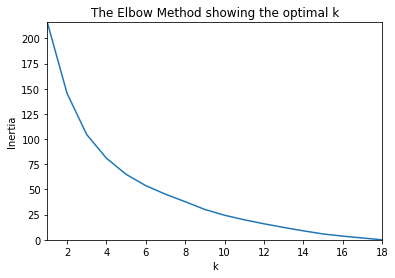

In [19]:
find_optimal_cluster_count(19, district_values_scaled)

Based on the above result and domain knowledge 6 is selected as the optimal cluster number, the data is clustered and cluster labels are assigned to each district. As before a convenience method, which will cluster the data and provide labels, is defined:

In [20]:
no_of_district_clusters = 6

In [21]:
def cluster_labels(clusters, input_data):
    k_means = KMeans(n_clusters=clusters, init='k-means++', n_init=100, n_jobs=12)
    k_means.fit(input_data)
    k_means_labels = k_means.labels_
    return k_means_labels

In [22]:
districts['label'] = cluster_labels(no_of_district_clusters, district_values_scaled)
districts

district  crimes_per100pop  unemployment_rate  \
0           Bemowo            1.7710             0.0087   
1        Białołęka            1.8744             0.0081   
2          Bielany            2.1365             0.0118   
3          Mokotów            2.3395             0.0103   
4           Ochota            3.2153             0.0107   
5   Praga-Południe            2.5277             0.0132   
6     Praga-Północ            4.6569             0.0177   
7        Rembertów            1.2894             0.0121   
8      Śródmieście            8.1719             0.0120   
9         Targówek            1.6925             0.0113   
10           Ursus            1.3094             0.0102   
11         Ursynów            1.5587             0.0071   
12           Wawer            1.5725             0.0110   
13          Wesoła            1.5731             0.0095   
14         Wilanów            1.4296             0.0064   
15          Włochy            3.2369             0.0106   
16            Wola            3.2654             0.0148   
17        Żoliborz            2.0133             0.0098   

    cycle_paths_per_road_area  dwelling_per10pop  new_dwellings_per100pop  \
0                      0.0943             4.8511                   1.1882   
1                      0.0582             5.1552                   3.3212   
2                      0.1254             5.2843                   0.5135   
3                      0.0969             6.0050                   1.0713   
4                      0.1400             5.9401                   0.5904   
5                      0.1074             5.7138                   1.7345   
6                      0.1231             5.4301                   0.4674   
7                      0.0389             4.2326                   0.5786   
8                      0.1624             6.6381                   0.1033   
9                      0.0883             4.8167                   1.4545   
10                     0.1272             4.8685                   1.7067   
11                     0.1049             4.8060                   0.4465   
12                     0.0423             4.2958                   0.8542   
13                     0.0618             3.6892                   0.7886   
14                     0.1081             6.1990                   2.4094   
15                     0.0611             5.7737                   2.5493   
16                     0.0951             6.7308                   2.7452   
17                     0.1283             6.4078                   1.0781   

    children_per100nursery_places  surgeries_per1000pop  \
0                            91.0                0.3576   
1                            80.0                0.3535   
2                            93.0                0.5081   
3                            90.0                0.9292   
4                            91.0                1.1591   
5                            94.0                0.7150   
6                            98.0                0.7919   
7                            82.0                0.3306   
8                            93.0                1.7647   
9                            91.0                0.4679   
10                           87.0                0.5533   
11                           88.0                0.7907   
12                           83.0                0.5877   
13                           80.0                0.6340   
14                           81.0                0.9048   
15                           85.0                0.4962   
16                           90.0                1.0120   
17                           94.0                0.9467   

    pharmacies_per10000pop  libraries_per10000pop  cinema_seats_per100pop  \
0                   2.5195                 0.5689                  1.9384   
1                   2.5485                 0.5755                  1.9426   
2                   2.7303                 0.9859                  0.00

Now the results of clustering can be presented on a map:

In [23]:
warsaw_map = folium.Map(location=warsaw_coordinates, zoom_start=10)
districts_map = folium.Choropleth(
    geo_data=districts_geo,
    data=districts,
    columns=['district', 'label'],
    key_on='properties.name',
    fill_color='BuPu', 
    fill_opacity=0.65, 
    line_opacity=0.25,
    legend_name='Categories',
    bins=6
).add_to(warsaw_map)
districts_map.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False))
display(warsaw_map)

When district data is split per cluster, clusters can be analysed individually and individual features visualised:

In [24]:
districts_clustered = []

for i in range(0, no_of_district_clusters, 1):
    cluster = districts.loc[districts['label'] == i]
    cluster = cluster.set_index('district')
    cluster = cluster.drop('label', axis=1)
    display(cluster)
    districts_clustered.append(cluster)

crimes_per100pop  unemployment_rate  cycle_paths_per_road_area  \
district                                                                   
Mokotów             2.3395             0.0103                     0.0969   
Żoliborz            2.0133             0.0098                     0.1283   

          dwelling_per10pop  new_dwellings_per100pop  \
district                                               
Mokotów              6.0050                   1.0713   
Żoliborz             6.4078                   1.0781   

          children_per100nursery_places  surgeries_per1000pop  \
district                                                        
Mokotów                            90.0                0.9292   
Żoliborz                           94.0                0.9467   

          pharmacies_per10000pop  libraries_per10000pop  \
district                                                  
Mokotów                   3.7719                 1.1500   
Żoliborz                  4.0574                 0.9661   

          cinema_seats_per100pop  sports_clubs_per10000pop  \
district                                                     
Mokotów                   3.0980                    1.7480   
Żoliborz                  6.7025                    1.5457   

          avg_dwelling_price10k_per_m2        metro        train  bus_tram  \
district                                                                     
Mokotów                         1.2003  2602.564103  2666.666667  0.871795   
Żoliborz                        1.3179  3000.000000  1200.000000  1.000000   

          time_to_city_centre  
district                       
Mokotów             25.897436  
Żoliborz            26.800000

crimes_per100pop  unemployment_rate  cycle_paths_per_road_area  \
district                                                                    
Białołęka            1.8744             0.0081                     0.0582   
Wilanów              1.4296             0.0064                     0.1081   
Włochy               3.2369             0.0106                     0.0611   

           dwelling_per10pop  new_dwellings_per100pop  \
district                                                
Białołęka             5.1552                   3.3212   
Wilanów               6.1990                   2.4094   
Włochy                5.7737                   2.5493   

           children_per100nursery_places  surgeries_per1000pop  \
district                                                         
Białołęka                           80.0                0.3535   
Wilanów                             81.0                0.9048   
Włochy                              85.0                0.4962   

           pharmacies_per10000pop  libraries_per10000pop  \
district                                                   
Białołęka                  2.5485                 0.5755   
Wilanów                    3.6193                 1.0341   
Włochy                     3.0715                 0.9451   

           cinema_seats_per100pop  sports_clubs_per10000pop  \
district                                                      
Białołęka                  1.9426                    1.7264   
Wilanów                    0.0000                    3.1022   
Włochy                     0.1418                    1.8901   

           avg_dwelling_price10k_per_m2   metro        train  bus_tram  \
district                                                                 
Białołęka                        0.8476  3000.0  2771.428571  0.800000   
Wilanów                          1.1776  3000.0  3000.000000  0.384615   
Włochy                           0.9955  3000.0  2227.272727  0.181818   

           time_to_city_centre  
district                        
Białołęka            40.971429  
Wilanów              43.846154  
Włochy               30.909091

crimes_per100pop  unemployment_rate  cycle_paths_per_road_area  \
district                                                                      
Śródmieście            8.1719              0.012                     0.1624   

             dwelling_per10pop  new_dwellings_per100pop  \
district                                                  
Śródmieście             6.6381                   0.1033   

             children_per100nursery_places  surgeries_per1000pop  \
district                                                           
Śródmieście                           93.0                1.7647   

             pharmacies_per10000pop  libraries_per10000pop  \
district                                                     
Śródmieście                  5.9397                 2.4964   

             cinema_seats_per100pop  sports_clubs_per10000pop  \
district                                                        
Śródmieście                  5.9802                    3.7016   

             avg_dwelling_price10k_per_m2   metro   train  bus_tram  \
district                                                              
Śródmieście                        1.5012  1400.0  1750.0       1.0   

             time_to_city_centre  
district                          
Śródmieście                 11.2

crimes_per100pop  unemployment_rate  \
district                                              
Ochota                    3.2153             0.0107   
Praga-Południe            2.5277             0.0132   
Praga-Północ              4.6569             0.0177   
Wola                      3.2654             0.0148   

                cycle_paths_per_road_area  dwelling_per10pop  \
district                                                       
Ochota                             0.1400             5.9401   
Praga-Południe                     0.1074             5.7138   
Praga-Północ                       0.1231             5.4301   
Wola                               0.0951             6.7308   

                new_dwellings_per100pop  children_per100nursery_places  \
district                                                                 
Ochota                           0.5904                           91.0   
Praga-Południe                   1.7345                           94.0   
Praga-Północ                     0.4674                           98.0   
Wola                             2.7452                           90.0   

                surgeries_per1000pop  pharmacies_per10000pop  \
district                                                       
Ochota                        1.1591                  4.1051   
Praga-Południe                0.7150                  3.9103   
Praga-Północ                  0.7919                  3.5715   
Wola                          1.0120                  4.0621   

                libraries_per10000pop  cinema_seats_per100pop  \
district                                                        
Ochota                         1.4489                  0.0000   
Praga-Południe                 1.2848                  1.7753   
Praga-Północ                   1.3975                  0.8478   
Wola                           1.0690                  0.6820   

                sports_clubs_per10000pop  avg_dwelling_price10k_per_m2  \
district                                                                 
Ochota                            1.3281                        1.1677   
Praga-Południe                    2.1786                        1.0741   
Praga-Północ                      1.2423                        1.1155   
Wola                              1.7104                        1.2535   

                 metro   train  bus_tram  time_to_city_centre  
district                                                       
Ochota          3000.0  1800.0     0.800                21.00  
Praga-Południe  2800.0  2460.0     0.960                24.52  
Praga-Północ    1125.0  1312.5     0.875                21.75  
Wola            2575.0  2375.0     0.800                24.95

crimes_per100pop  unemployment_rate  cycle_paths_per_road_area  \
district                                                                    
Rembertów            1.2894             0.0121                     0.0389   
Wawer                1.5725             0.0110                     0.0423   
Wesoła               1.5731             0.0095                     0.0618   

           dwelling_per10pop  new_dwellings_per100pop  \
district                                                
Rembertów             4.2326                   0.5786   
Wawer                 4.2958                   0.8542   
Wesoła                3.6892                   0.7886   

           children_per100nursery_places  surgeries_per1000pop  \
district                                                         
Rembertów                           82.0                0.3306   
Wawer                               83.0                0.5877   
Wesoła                              80.0                0.6340   

           pharmacies_per10000pop  libraries_per10000pop  \
district                                                   
Rembertów                  3.3061                 1.2398   
Wawer                      4.0489                 0.9143   
Wesoła                     3.5663                 1.5850   

           cinema_seats_per100pop  sports_clubs_per10000pop  \
district                                                      
Rembertów                  0.0000                    2.0663   
Wawer                      0.1123                    3.1346   
Wesoła                     0.0000                    5.1514   

           avg_dwelling_price10k_per_m2   metro        train  bus_tram  \
district                                                                 
Rembertów                        0.8239  3000.0  2333.333333  1.000000   
Wawer                            0.8759  3000.0  2184.210526  0.631579   
Wesoła                           1.0167  3000.0  3000.000000  0.333333   

           time_to_city_centre  
district                        
Rembertów            44.000000  
Wawer                41.052632  
Wesoła               42.000000

crimes_per100pop  unemployment_rate  cycle_paths_per_road_area  \
district                                                                   
Bemowo              1.7710             0.0087                     0.0943   
Bielany             2.1365             0.0118                     0.1254   
Targówek            1.6925             0.0113                     0.0883   
Ursus               1.3094             0.0102                     0.1272   
Ursynów             1.5587             0.0071                     0.1049   

          dwelling_per10pop  new_dwellings_per100pop  \
district                                               
Bemowo               4.8511                   1.1882   
Bielany              5.2843                   0.5135   
Targówek             4.8167                   1.4545   
Ursus                4.8685                   1.7067   
Ursynów              4.8060                   0.4465   

          children_per100nursery_places  surgeries_per1000pop  \
district                                                        
Bemowo                             91.0                0.3576   
Bielany                            93.0                0.5081   
Targówek                           91.0                0.4679   
Ursus                              87.0                0.5533   
Ursynów                            88.0                0.7907   

          pharmacies_per10000pop  libraries_per10000pop  \
district                                                  
Bemowo                    2.5195                 0.5689   
Bielany                   2.7303                 0.9859   
Targówek                  3.0655                 1.3714   
Ursus                     2.1795                 0.6706   
Ursynów                   3.5879                 1.0631   

          cinema_seats_per100pop  sports_clubs_per10000pop  \
district                                                     
Bemowo                    1.9384                    1.9506   
Bielany                   0.0000                    2.0477   
Targówek                  2.2426                    1.5327   
Ursus                     1.0629                    2.0118   
Ursynów                   1.9009                    1.8604   

          avg_dwelling_price10k_per_m2        metro        train  bus_tram  \
district                                                                     
Bemowo                          1.0195  3000.000000  3000.000000  0.888889   
Bielany                         1.0717  1730.769231  3000.000000  1.000000   
Targówek                        0.9335  2000.000000  2357.142857  0.857143   
Ursus                           0.8910  3000.000000  1230.769231  0.923077   
Ursynów                         1.0995  2600.000000  2800.000000  0.800000   

          time_to_city_centre  
district                       
Bemowo              45.555556  
Bielany             26.538462  
Targówek            27.285714  
Ursus               31.538462  
Ursynów             32.000000

In [75]:
def draw_charts(clustered_data, plot_kind, bar_width=0, chart_width=2.5, save_fig=False, save_name='charts.png', closure=None):
    fig = plt.figure()
    axes = []
    max_values = []
    clusters = len(clustered_data)
    features = clustered_data[0].shape[1]
    cell = 1
    kind=plot_kind
    
    for row in range(0, features, 1):
        max_values = []
        for column in range(0, clusters, 1):
            max_values.append(clustered_data[column].iloc[:, row].max())
            
        max_value = max(max_values)
        
        for column in range(0, clusters, 1):
            ax = fig.add_subplot(features, clusters, cell)
            ax.set_ylim(0, max_value*1.1)
            ax.set_title('Cluster '+str(column))
            if column == 0:
                ax.set_ylabel(categories_descriptions[clustered_data[0].columns[row]])
            else:
                ax.get_yaxis().set_ticks([])
            axes.append(ax)
            
            if bar_width == 0:
                clustered_data[column].iloc[:, row].plot(kind=kind, figsize=(chart_width*clusters, 4*features), ax=axes[cell-1])
            else:
                clustered_data[column].iloc[:, row].plot(kind=kind, width=bar_width, figsize=(chart_width*clusters, 4*features), ax=axes[cell-1])
            
            mean = clustered_data[column].iloc[:, row].mean()
            means = []
            for point in range(0, clustered_data[column].shape[0], 1):
                means.append(mean)
            pd.DataFrame(means).plot(kind='line', c='red', ls='--', ax=axes[cell-1], legend=None)
            
            if len(means) == 1:
                ax.text(0, mean*1.05, '%.3f' % mean, color='red', size=10, ha='center', weight='bold')
            else:
                ax.text(0, mean*1.05, '%.3f' % mean, color='red', size=10, ha='left', weight='bold')

            ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='center')
            
            if closure != None:
                closure(ax)
            
            cell += 1
    
    fig.tight_layout()
    if save_fig == True:
        fig.savefig(save_name, transparent=False, dpi=114, bbox_inches="tight")

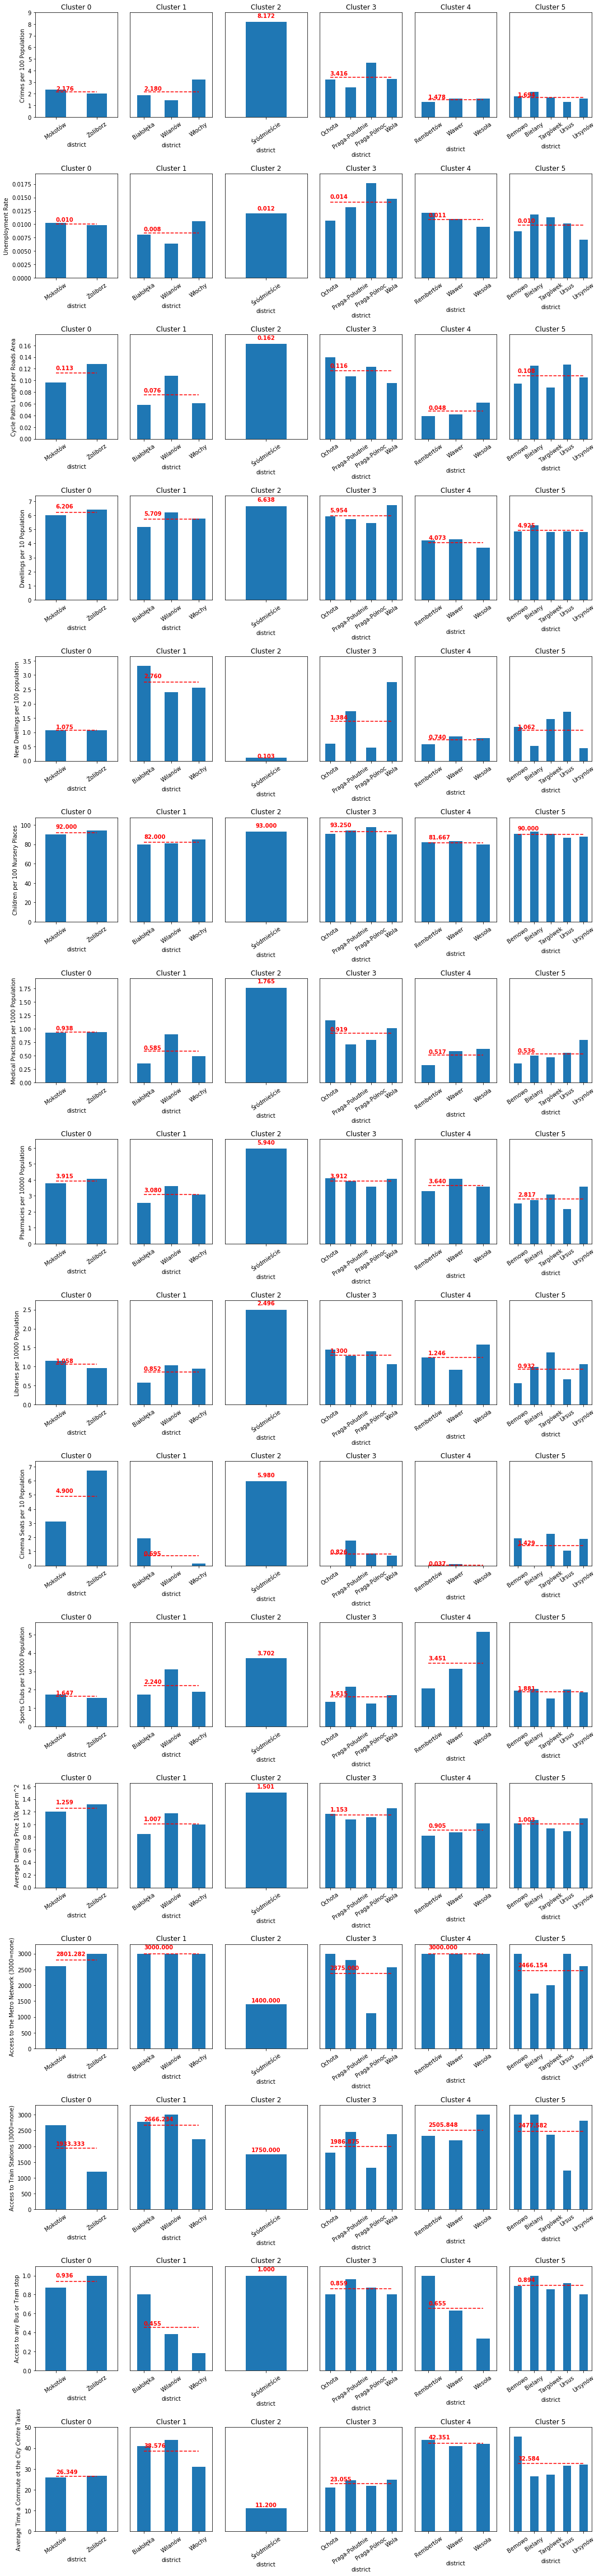

In [76]:
def format_xticks(ax):
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='center')

draw_charts(districts_clustered, 'bar', closure=format_xticks, save_fig=True, save_name='districts.png')

### 3.2 Developments - public transport data

Now the developments will be inspected, first by visualising them on a map:

In [27]:
developments

development                        address  longitude  \
0      19. Dzielnica / Etap IV                ul. Kolejowa 49  20.980202   
1             Aleja Słowiańska              Al. Słowiańska 25  20.965545   
2      Aleje przy Czereśniowej  Aleje Jerozolimskie 198R-198S  20.928252   
3                  Aluzyjna 19                ul. Aluzyjna 19  20.943133   
4        Apartamenty Bokserska               ul. Bokserska 56  20.994545   
..                         ...                            ...        ...   
253               Ziemowita 4a        ul. Księcia Ziemowita 4  21.061233   
254                   Złota 44                   ul. Złota 44  21.002372   
255       Żoliborz Artystyczny         pl. Czesława Niemena 1  20.969677   
256  Żoliborz Business Concept   ul. Powązkowska/Krasińskiego  20.961935   
257               Zwoleńska 90               ul. Zwoleńska 90  21.151935   

      latitude  metro  train  bus_tram  time_to_city_centre     district  
0    52.226219   1000   1000         0                   18         Wola  
1    52.275543    500   3000         1                   19      Bielany  
2    52.199298   3000   3000         0                   32       Włochy  
3    52.346246   3000   3000         1                   47    Białołęka  
4    52.170751   3000   3000         1                   32      Mokotów  
..         ...    ...    ...       ...                  ...          ...  
253  52.262664   3000   3000         1                   28     Targówek  
254  52.231042    500    500         1                    6  Śródmieście  
255  52.258579   3000    500         1                   29     Żoliborz  
256  52.259692   3000   1000         1                   25     Żoliborz  
257  52.201150   3000   3000         1                   45        Wawer  

[258 rows x 9 columns]

In [28]:
import unidecode

In [29]:
warsaw_map_developments = folium.Map(location=warsaw_coordinates, zoom_start=10)
developments_map = folium.Choropleth(
    geo_data=districts_geo,
    data=None,
    columns=['district', 'label'],
    key_on='properties.name',
    fill_color='blue', 
    fill_opacity=0.05, 
    line_opacity=0.5
).add_to(warsaw_map_developments)
developments_map.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False))

for lat, lng, district, development in zip(developments['latitude'], developments['longitude'], developments['district'], developments['development']):
    label = '{}, {}'.format(development, district)
    label = unidecode.unidecode(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        tooltip=label,
        color='blue',
        fill=True,
        parse_html=True).add_to(warsaw_map_developments)  

display(warsaw_map_developments)

The developments can be clustered by comparing the public transport data such as access to the metro network, train stations, other means of transport (bus, tram), and the time it takes to commute ot the city centre.  
  
First, the data needs to be scaled:

In [30]:
scaler_dev = StandardScaler()
development_values_scaled = scaler_dev.fit_transform(developments.iloc[:, 4:8])

Next the optimal number of clusters is obtained:

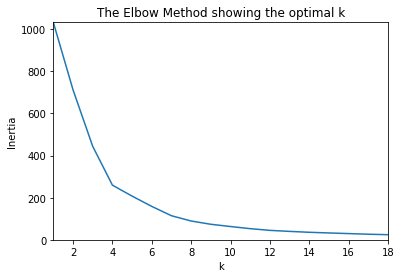

In [31]:
find_optimal_cluster_count(19, development_values_scaled)

In [32]:
no_of_development_clusters = 4

The data is clustered and cluster labels are assigned to each development.

In [33]:
developments['label'] = cluster_labels(no_of_development_clusters, development_values_scaled)
developments

development                        address  longitude  \
0      19. Dzielnica / Etap IV                ul. Kolejowa 49  20.980202   
1             Aleja Słowiańska              Al. Słowiańska 25  20.965545   
2      Aleje przy Czereśniowej  Aleje Jerozolimskie 198R-198S  20.928252   
3                  Aluzyjna 19                ul. Aluzyjna 19  20.943133   
4        Apartamenty Bokserska               ul. Bokserska 56  20.994545   
..                         ...                            ...        ...   
253               Ziemowita 4a        ul. Księcia Ziemowita 4  21.061233   
254                   Złota 44                   ul. Złota 44  21.002372   
255       Żoliborz Artystyczny         pl. Czesława Niemena 1  20.969677   
256  Żoliborz Business Concept   ul. Powązkowska/Krasińskiego  20.961935   
257               Zwoleńska 90               ul. Zwoleńska 90  21.151935   

      latitude  metro  train  bus_tram  time_to_city_centre     district  \
0    52.226219   1000   1000         0                   18         Wola   
1    52.275543    500   3000         1                   19      Bielany   
2    52.199298   3000   3000         0                   32       Włochy   
3    52.346246   3000   3000         1                   47    Białołęka   
4    52.170751   3000   3000         1                   32      Mokotów   
..         ...    ...    ...       ...                  ...          ...   
253  52.262664   3000   3000         1                   28     Targówek   
254  52.231042    500    500         1                    6  Śródmieście   
255  52.258579   3000    500         1                   29     Żoliborz   
256  52.259692   3000   1000         1                   25     Żoliborz   
257  52.201150   3000   3000         1                   45        Wawer   

     label  
0        2  
1        2  
2        0  
3        1  
4        1  
..     ...  
253      1  
254      2  
255      3  
256      3  
257      1  

[258 rows x 10 columns]

The developments are separated based on the clusters they are assigned to:

In [34]:
developments_clustered_pt = []

for i in range(0, no_of_development_clusters, 1):
    cluster = developments.loc[developments['label'] == i]
    cluster = cluster.set_index('development')
    cluster = cluster.drop('label', axis=1)
    cluster = cluster.iloc[:, 3:7]
    display(cluster.head())
    display(cluster.shape)
    developments_clustered_pt.append(cluster)

metro  train  bus_tram  time_to_city_centre
development                                                                
Aleje przy Czereśniowej          3000   3000         0                   32
Apartamenty Łąkowa               3000   3000         0                   53
Apartamenty Park Szczęśliwicki   3000   3000         0                   28
Apartamenty/Domy Stare Włochy    3000   3000         0                   32
Aura Garden                      3000   3000         0                   46

(49, 4)

metro  train  bus_tram  time_to_city_centre
development                                                           
Aluzyjna 19                 3000   3000         1                   47
Apartamenty Bokserska       3000   3000         1                   32
Apartamenty Dolny Mokotów   3000   3000         1                   18
Apartamenty Królewskie      3000   3000         1                   34
Apartamenty Modlińska       3000   3000         1                   31

(119, 4)

metro  train  bus_tram  time_to_city_centre
development                                                            
19. Dzielnica / Etap IV      1000   1000         0                   18
Aleja Słowiańska              500   3000         1                   19
Apartamenty Cosmopolitan      500   1000         1                    6
Apartamenty Oszmiańska 20    1000   3000         1                   27
Apartamenty przy Woronicza    500   3000         1                   11

(39, 4)

metro  train  bus_tram  time_to_city_centre
development                                                              
Apartamenty Niemcewicza 19     3000   1000         1                   11
Apartamenty Nowy Marysin       3000   1000         1                   22
Apartamenty Nowy Marysin IVa   3000    500         1                   22
Apartamenty Stylowa            3000   1000         0                   30
Apartamenty Włodarzewska 70    3000   1000         1                   26

(51, 4)

The spatial distribution of the obtained clusters can be inspected on a map:

In [35]:
#map_dev = None
warsaw_map_developments_pt = folium.Map(location=warsaw_coordinates, zoom_start=10)
map_dev = folium.Choropleth(
    geo_data=districts_geo,
    data=None,
    columns=['district', 'label'],
    key_on='properties.name',
    fill_color='blue', 
    fill_opacity=0.05, 
    line_opacity=0.5
).add_to(warsaw_map_developments_pt)
map_dev.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False))

In [71]:
colors = ['red', 'yellow', 'lightgreen', 'green', 'lightgreen', 'darkpurple', 'orange', 'cadetblue', 'darkblue', 'white']

In [72]:
for lat, lng, district, development, cluster in zip(developments['latitude'], developments['longitude'], developments['district'], developments['development'], developments['label']):
    label = '{}, {}'.format(development, district)
    label = unidecode.unidecode(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        tooltip=label,
        color=colors[cluster],
        fill=False,
        parse_html=True).add_to(warsaw_map_developments_pt)  

display(warsaw_map_developments_pt)

Values of individual features are presented in the charts below:

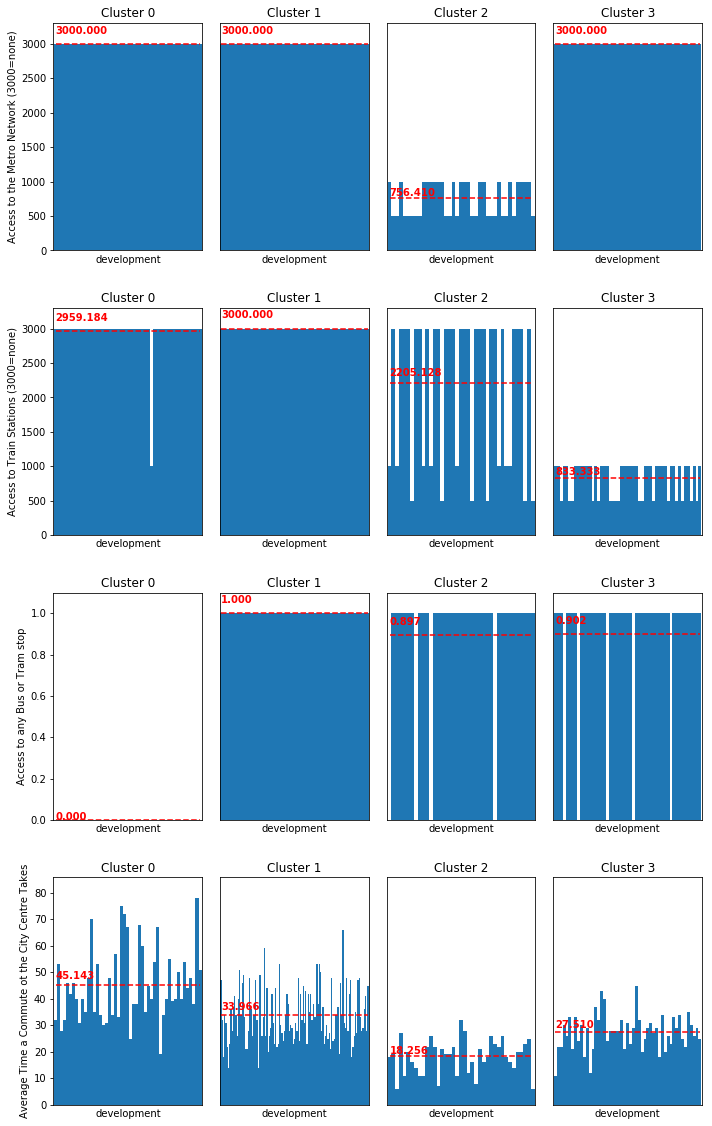

In [77]:
def remove_xticks(ax):
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

draw_charts(developments_clustered_pt, 'bar', 1, closure=remove_xticks, save_fig=True, save_name='public transport.png')

### 3.3 Developments - commute time data

Independently of general access to public transport the time it takes to reach the city centre can be analysed. In order to do so each of the developments is assigned a label: 0 for up to 15 minutes, 1 for 16-30 min, 2 for 21-45 min, and 3 for more than 45 min:

In [39]:
for row in range(0, developments.shape[0]):
    time_to_city_centre = developments.loc[row, 'time_to_city_centre']
    if time_to_city_centre < 16:
        developments.loc[row, 'commute label'] = 0
    elif time_to_city_centre > 15 and time_to_city_centre < 31:
        developments.loc[row, 'commute label'] = 1
    elif time_to_city_centre > 30 and time_to_city_centre < 46:
        developments.loc[row, 'commute label'] = 2
    elif time_to_city_centre > 45:
        developments.loc[row, 'commute label'] = 3

developments['commute label'] = developments['commute label'].astype(int)

developments

development                        address  longitude  \
0      19. Dzielnica / Etap IV                ul. Kolejowa 49  20.980202   
1             Aleja Słowiańska              Al. Słowiańska 25  20.965545   
2      Aleje przy Czereśniowej  Aleje Jerozolimskie 198R-198S  20.928252   
3                  Aluzyjna 19                ul. Aluzyjna 19  20.943133   
4        Apartamenty Bokserska               ul. Bokserska 56  20.994545   
..                         ...                            ...        ...   
253               Ziemowita 4a        ul. Księcia Ziemowita 4  21.061233   
254                   Złota 44                   ul. Złota 44  21.002372   
255       Żoliborz Artystyczny         pl. Czesława Niemena 1  20.969677   
256  Żoliborz Business Concept   ul. Powązkowska/Krasińskiego  20.961935   
257               Zwoleńska 90               ul. Zwoleńska 90  21.151935   

      latitude  metro  train  bus_tram  time_to_city_centre     district  \
0    52.226219   1000   1000         0                   18         Wola   
1    52.275543    500   3000         1                   19      Bielany   
2    52.199298   3000   3000         0                   32       Włochy   
3    52.346246   3000   3000         1                   47    Białołęka   
4    52.170751   3000   3000         1                   32      Mokotów   
..         ...    ...    ...       ...                  ...          ...   
253  52.262664   3000   3000         1                   28     Targówek   
254  52.231042    500    500         1                    6  Śródmieście   
255  52.258579   3000    500         1                   29     Żoliborz   
256  52.259692   3000   1000         1                   25     Żoliborz   
257  52.201150   3000   3000         1                   45        Wawer   

     label  commute label  
0        2              1  
1        2              1  
2        0              2  
3        1              3  
4        1              2  
..     ...            ...  
253      1              1  
254      2              0  
255      3              1  
256      3              1  
257      1              2  

[258 rows x 11 columns]

All is left is to divide the developments and visualise the results on a map:

In [40]:
developments_clustered_commute = []

for i in range(0, 4, 1):
    cluster = developments.loc[developments['commute label'] == i]
    cluster = cluster.set_index('development')
    cluster = cluster.drop('label', axis=1)
    cluster = cluster.iloc[:, 6:7]
    display(cluster.head())
    display(cluster.shape)
    developments_clustered_commute.append(cluster)

time_to_city_centre
development                                    
Apartamenty Cosmopolitan                      6
Apartamenty Niemcewicza 19                   11
Apartamenty Ogrodowa                         14
Apartamenty przy Woronicza                   11
Avore                                        14

(15, 1)

time_to_city_centre
development                                   
19. Dzielnica / Etap IV                     18
Aleja Słowiańska                            19
Apartamenty Dolny Mokotów                   18
Apartamenty nad Potokiem                    22
Apartamenty Nowy Marysin                    22

(113, 1)

time_to_city_centre
development                                 
Aleje przy Czereśniowej                   32
Apartamenty Bokserska                     32
Apartamenty Królewskie                    34
Apartamenty Modlińska                     31
Apartamenty Ostródzka                     36

(88, 1)

time_to_city_centre
development                                    
Aluzyjna 19                                  47
Apartamenty Łąkowa                           53
Aura Garden                                  46
Bemowo Line                                  51
Bliżej Gwiazd na Mehoffera                   46

(42, 1)

In [41]:
map_com = None
warsaw_map_developments_com = folium.Map(location=warsaw_coordinates, zoom_start=10)
map_com = folium.Choropleth(
    geo_data=districts_geo,
    data=None,
    columns=['district', 'label'],
    key_on='properties.name',
    fill_color='blue', 
    fill_opacity=0.05, 
    line_opacity=0.5
).add_to(warsaw_map_developments_com)
map_dev.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False))

In [42]:
colors_com = ['lightgreen', 'green', 'yellow', 'red']

In [43]:
for lat, lng, district, development, cluster in zip(developments['latitude'], developments['longitude'], developments['district'], developments['development'], developments['commute label']):
    label = '{}, {}'.format(development, district)
    label = unidecode.unidecode(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        tooltip=label,
        color=colors_com[cluster],
        fill=False,
        parse_html=True).add_to(warsaw_map_developments_com)  

display(warsaw_map_developments_com)

### 3.4 Districts - venue data (Foursquare)

Lastly, let's take a look at the similarities between different districts in access to shops, services, and other venues as listed on Foursquare. Due to the limitations of the Foursquare API we can't look up all the venues within an arbitrary area such as a district defined as a polygon described by geographical coordinates. Instead we will take a centroid of each district and draw a circle around it with area equal to the actual area of the district.  
  
Here is a list of such circle radiuses for the districts:

In [44]:
radii = [2820, 4820, 3210, 3360, 1760, 2670, 1910, 2480, 2230, 2780, 1730, 3730, 5040, 2700, 3420, 3020, 2480, 1640]

Lists of longitudes and latitudes of the centroids are needed as well:

In [45]:
district_lng = []
district_lat = []
for district in districts_centroids:
    district_lng.append(districts_centroids[district].coords[0][0])
    district_lat.append(districts_centroids[district].coords[0][1])

Now the data for the venues for each districts can be fetched from Foursquare:

In [47]:
import requests

In [48]:
def getNearbyVenues(names, latitudes, longitudes, radiuses):
    print('working ', end='')
    
    venues_list=[]
    for name, lat, lng, rad in zip(names, latitudes, longitudes, radiuses):
        print('. ', end='')
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            client_id, 
            client_secret, 
            version, 
            lat, 
            lng, 
            rad, 
            limit)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print('done')
    return(nearby_venues)

In [49]:
limit = 100
districts_venues = getNearbyVenues(names=districts['district'],
                                   latitudes=district_lat,
                                   longitudes=district_lng,
                                   radiuses=radii
                                  )

working . . . . . . . . . . . . . . . . . . done


To verify the results, and how many there are for each of the districts:

In [50]:
print(districts_venues.shape)
districts_venues.head()

(1310, 7)


District  District Latitude  District Longitude             Venue  \
0   Bemowo          52.245927           20.903917    Zdrofit Bemowo   
1   Bemowo          52.245927           20.903917  Decathlon Bemowo   
2   Bemowo          52.245927           20.903917           CieKawa   
3   Bemowo          52.245927           20.903917       La Fiaccola   
4   Bemowo          52.245927           20.903917   Park Gorczewska   

   Venue Latitude  Venue Longitude        Venue Category  
0       52.245641        20.906136  Gym / Fitness Center  
1       52.240792        20.891503   Sporting Goods Shop  
2       52.242059        20.913374                  Café  
3       52.240811        20.912208    Italian Restaurant  
4       52.233976        20.905266                  Park

In [51]:
districts_venues.groupby('District').count()

District Latitude  District Longitude  Venue  Venue Latitude  \
District                                                                       
Bemowo                         75                  75     75              75   
Białołęka                      59                  59     59              59   
Bielany                        66                  66     66              66   
Mokotów                       100                 100    100             100   
Ochota                        100                 100    100             100   
Praga-Południe                 99                  99     99              99   
Praga-Północ                  100                 100    100             100   
Rembertów                      15                  15     15              15   
Targówek                       69                  69     69              69   
Ursus                          44                  44     44              44   
Ursynów                       100                 100    100             100   
Wawer                          44                  44     44              44   
Wesoła                         19                  19     19              19   
Wilanów                        63                  63     63              63   
Wola                          100                 100    100             100   
Włochy                         57                  57     57              57   
Śródmieście                   100                 100    100             100   
Żoliborz                      100                 100    100             100   

                Venue Longitude  Venue Category  
District                                         
Bemowo                       75              75  
Białołęka                    59              59  
Bielany                      66              66  
Mokotów                     100             100  
Ochota                      100             100  
Praga-Południe               99              99  
Praga-Północ                100             100  
Rembertów                    15              15  
Targówek                     69              69  
Ursus                        44              44  
Ursynów                     100             100  
Wawer                        44              44  
Wesoła                       19              19  
Wilanów                      63              63  
Wola                        100             100  
Włochy                       57              57  
Śródmieście                 100             100  
Żoliborz                    100             100

(Not a great coverage from Foursquare.)  
The number of different venue categories:

In [52]:
print('There are {} uniques categories.'.format(len(districts_venues['Venue Category'].unique())))

There are 216 uniques categories.


Next this data will be turned into occurrence frequencies for each district. Starting by "one hot" encoding the values:

In [53]:
districts_onehot = pd.get_dummies(districts_venues[['Venue Category']], prefix="", prefix_sep="")
districts_onehot['District'] = districts_venues['District'] 
fixed_columns = [districts_onehot.columns[-1]] + list(districts_onehot.columns[:-1])
districts_onehot = districts_onehot[fixed_columns]
districts_onehot.head()

District  Airport  Airport Lounge  American Restaurant  Aquarium  Arcade  \
0   Bemowo        0               0                    0         0       0   
1   Bemowo        0               0                    0         0       0   
2   Bemowo        0               0                    0         0       0   
3   Bemowo        0               0                    0         0       0   
4   Bemowo        0               0                    0         0       0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  ...  \
0            0           0                    0                 0  ...   
1            0           0                    0                 0  ...   
2            0           0                    0                 0  ...   
3            0           0                    0                 0  ...   
4            0           0                    0                 0  ...   

   Ukrainian Restaurant  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0                     0                              0                      0   
1                     0                              0                      0   
2                     0                              0                      0   
3                     0                              0                      0   
4                     0                              0                      0   

   Warehouse Store  Water Park  Wine Bar  Wine Shop  Yoga Studio  Zoo  \
0                0           0         0          0            0    0   
1                0           0         0          0            0    0   
2                0           0         0          0            0    0   
3                0           0         0          0            0    0   
4                0           0         0          0            0    0   

   Zoo Exhibit  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 217 columns]

In [54]:
districts_onehot.shape

(1310, 217)

Values are averaged for each venue so that every district has one row with values of the average frequency of occurrence of each of the venue type:

In [55]:
districts_grouped = districts_onehot.groupby('District').mean().reset_index()
districts_grouped

District   Airport  Airport Lounge  American Restaurant  Aquarium  \
0           Bemowo  0.013333        0.000000             0.000000      0.00   
1        Białołęka  0.000000        0.000000             0.000000      0.00   
2          Bielany  0.015152        0.000000             0.000000      0.00   
3          Mokotów  0.000000        0.000000             0.000000      0.00   
4           Ochota  0.000000        0.000000             0.020000      0.00   
5   Praga-Południe  0.000000        0.000000             0.000000      0.00   
6     Praga-Północ  0.000000        0.000000             0.000000      0.01   
7        Rembertów  0.000000        0.000000             0.000000      0.00   
8         Targówek  0.000000        0.000000             0.000000      0.00   
9            Ursus  0.000000        0.000000             0.000000      0.00   
10         Ursynów  0.000000        0.000000             0.010000      0.00   
11           Wawer  0.000000        0.000000             0.022727      0.00   
12          Wesoła  0.000000        0.000000             0.000000      0.00   
13         Wilanów  0.000000        0.000000             0.000000      0.00   
14            Wola  0.000000        0.000000             0.000000      0.00   
15          Włochy  0.017544        0.017544             0.017544      0.00   
16     Śródmieście  0.000000        0.000000             0.000000      0.00   
17        Żoliborz  0.000000        0.000000             0.000000      0.00   

      Arcade  Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0   0.000000         0.00    0.000000                 0.00          0.026667   
1   0.000000         0.00    0.000000                 0.00          0.000000   
2   0.000000         0.00    0.000000                 0.00          0.030303   
3   0.000000         0.01    0.000000                 0.00          0.010000   
4   0.010000         0.00    0.000000                 0.00          0.010000   
5   0.000000         0.00    0.010101                 0.00          0.000000   
6   0.000000         0.00    0.000000                 0.00          0.000000   
7   0.000000         0.00    0.000000                 0.00          0.000000   
8   0.000000         0.00    0.000000                 0.00          0.000000   
9   0.000000         0.00    0.000000                 0.00          0.000000   
10  0.000000         0.00    0.000000                 0.00          0.000000   
11  0.000000         0.00    0.000000                 0.00          0.000000   
12  0.000000         0.00    0.000000                 0.00          0.000000   
13  0.015873         0.00    0.000000                 0.00          0.000000   
14  0.000000         0.00    0.000000                 0.01          0.010000   
15  0.000000         0.00    0.000000                 0.00          0.000000   
16  0.000000         0.01    0.010000                 0.01          0.010000   
17  0.000000         0.00    0.000000                 0.00          0.000000   

    ...  Ukrainian Restaurant  Vegetarian / Vegan Restaurant  \
0   ...                  0.00                           0.00   
1   ...                  0.00                           0.00   
2   ...                  0.00                           0.00   
3   ...                  0.01                           0.02   
4   ...                  0.00                           0.02   
5   ...                  0.00                           0.00   
6   ...                  0.00                           0.01   
7   ...                  0.00                           0.00   
8   ...                  0.00                           0.00   
9   ...                  0.00                           0.00   
10  ...                  0.00                           0.00   
11  ...                  0.00                           0.00   
12  ...                  0.00                           0.00   
13  ...                  0.00                           0.00   
14  ...                  0.

In [56]:
districts_grouped.shape

(18, 217)

Now the most frequently occurring venue types for each of the districts can be extracted:

In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
import numpy as np

In [59]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = districts_grouped['District']

for ind in np.arange(districts_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(districts_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted

District 1st Most Common Venue 2nd Most Common Venue  \
0           Bemowo           Supermarket    Italian Restaurant   
1        Białołęka           Supermarket                 Hotel   
2          Bielany                  Café         Grocery Store   
3          Mokotów                  Park                  Café   
4           Ochota                  Café                  Park   
5   Praga-Południe                  Café           Bus Station   
6     Praga-Północ                 Plaza                   Bar   
7        Rembertów           Supermarket           Bus Station   
8         Targówek           Supermarket           Bus Station   
9            Ursus                  Park           Supermarket   
10         Ursynów                  Café           Pizza Place   
11           Wawer                 Hotel                  Café   
12          Wesoła         Grocery Store           Bus Station   
13         Wilanów    Italian Restaurant                  Café   
14            Wola                  Café  Gym / Fitness Center   
15          Włochy                 Hotel           Coffee Shop   
16     Śródmieście                  Café          Cocktail Bar   
17        Żoliborz                  Park    Italian Restaurant   

     3rd Most Common Venue 4th Most Common Venue  \
0              Coffee Shop                  Café   
1     Fast Food Restaurant           Pizza Place   
2              Coffee Shop  Gym / Fitness Center   
3              Coffee Shop    Italian Restaurant   
4       Italian Restaurant           Coffee Shop   
5         Sushi Restaurant    Italian Restaurant   
6                     Café    Italian Restaurant   
7         Department Store        History Museum   
8   Furniture / Home Store                   Gym   
9              Bus Station         Train Station   
10       Indian Restaurant                  Park   
11           Grocery Store           Supermarket   
12             Pizza Place                  Park   
13          Ice Cream Shop                  Park   
14        Sushi Restaurant                  Park   
15      Italian Restaurant                  Café   
16                   Hotel                  Park   
17                    Café           Coffee Shop   

            5th Most Common Venue  
0                     Bus Station  
1                     Bus Station  
2                             Gym  
3                  Ice Cream Shop  
4                     Supermarket  
5                  Ice Cream Shop  
6                     Zoo Exhibit  
7                            Café  
8                    Tram Station  
9            Gym / Fitness Center  
10             Italian Restaurant  
11                     Restaurant  
12           Fast Food Restaurant  
13            Japanese Restaurant  
14                    Pizza Place  
15                           Park  
16  Vegetarian / Vegan Restaurant  
17           Gym / Fitness Center

Having these values districts can now be grouped based on their similarity:

In [60]:
districts_grouped_clustering = districts_grouped.drop('District', 1)

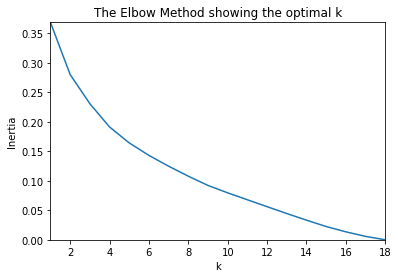

In [61]:
find_optimal_cluster_count(19, districts_grouped_clustering)

In [62]:
no_of_venue_clusters = 5

In [63]:
districts_grouped_clustering

Airport  Airport Lounge  American Restaurant  Aquarium    Arcade  \
0   0.013333        0.000000             0.000000      0.00  0.000000   
1   0.000000        0.000000             0.000000      0.00  0.000000   
2   0.015152        0.000000             0.000000      0.00  0.000000   
3   0.000000        0.000000             0.000000      0.00  0.000000   
4   0.000000        0.000000             0.020000      0.00  0.010000   
5   0.000000        0.000000             0.000000      0.00  0.000000   
6   0.000000        0.000000             0.000000      0.01  0.000000   
7   0.000000        0.000000             0.000000      0.00  0.000000   
8   0.000000        0.000000             0.000000      0.00  0.000000   
9   0.000000        0.000000             0.000000      0.00  0.000000   
10  0.000000        0.000000             0.010000      0.00  0.000000   
11  0.000000        0.000000             0.022727      0.00  0.000000   
12  0.000000        0.000000             0.000000      0.00  0.000000   
13  0.000000        0.000000             0.000000      0.00  0.015873   
14  0.000000        0.000000             0.000000      0.00  0.000000   
15  0.017544        0.017544             0.017544      0.00  0.000000   
16  0.000000        0.000000             0.000000      0.00  0.000000   
17  0.000000        0.000000             0.000000      0.00  0.000000   

    Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0          0.00    0.000000                 0.00          0.026667   
1          0.00    0.000000                 0.00          0.000000   
2          0.00    0.000000                 0.00          0.030303   
3          0.01    0.000000                 0.00          0.010000   
4          0.00    0.000000                 0.00          0.010000   
5          0.00    0.010101                 0.00          0.000000   
6          0.00    0.000000                 0.00          0.000000   
7          0.00    0.000000                 0.00          0.000000   
8          0.00    0.000000                 0.00          0.000000   
9          0.00    0.000000                 0.00          0.000000   
10         0.00    0.000000                 0.00          0.000000   
11         0.00    0.000000                 0.00          0.000000   
12         0.00    0.000000                 0.00          0.000000   
13         0.00    0.000000                 0.00          0.000000   
14         0.00    0.000000                 0.01          0.010000   
15         0.00    0.000000                 0.00          0.000000   
16         0.01    0.010000                 0.01          0.010000   
17         0.00    0.000000                 0.00          0.000000   

    Athletics & Sports  ...  Ukrainian Restaurant  \
0             0.013333  ...                  0.00   
1             0.000000  ...                  0.00   
2             0.015152  ...                  0.00   
3             0.010000  ...                  0.01   
4             0.000000  ...                  0.00   
5             0.010101  ...                  0.00   
6             0.000000  ...                  0.00   
7             0.000000  ...                  0.00   
8             0.000000  ...                  0.00   
9             0.000000  ...                  0.00   
10            0.010000  ...                  0.00   
11            0.000000  ...                  0.00   
12            0.000000  ...                  0.00   
13            0.015873  ...                  0.00   
14            0.000000  ...                  0.00   
15            0.000000  ...                  0.00   
16            0.000000  ...                  0.00   
17            0.000000  ...                  0.00   

    Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Warehouse Store  \
0                            0.00               0.000000         0.000000   
1                            0.00               0.016949         0.016949   
2                            0.00              

In [64]:
districts_venues_sorted['venue label'] = cluster_labels(no_of_venue_clusters, districts_grouped_clustering)
districts_venues_sorted

District 1st Most Common Venue 2nd Most Common Venue  \
0           Bemowo           Supermarket    Italian Restaurant   
1        Białołęka           Supermarket                 Hotel   
2          Bielany                  Café         Grocery Store   
3          Mokotów                  Park                  Café   
4           Ochota                  Café                  Park   
5   Praga-Południe                  Café           Bus Station   
6     Praga-Północ                 Plaza                   Bar   
7        Rembertów           Supermarket           Bus Station   
8         Targówek           Supermarket           Bus Station   
9            Ursus                  Park           Supermarket   
10         Ursynów                  Café           Pizza Place   
11           Wawer                 Hotel                  Café   
12          Wesoła         Grocery Store           Bus Station   
13         Wilanów    Italian Restaurant                  Café   
14            Wola                  Café  Gym / Fitness Center   
15          Włochy                 Hotel           Coffee Shop   
16     Śródmieście                  Café          Cocktail Bar   
17        Żoliborz                  Park    Italian Restaurant   

     3rd Most Common Venue 4th Most Common Venue  \
0              Coffee Shop                  Café   
1     Fast Food Restaurant           Pizza Place   
2              Coffee Shop  Gym / Fitness Center   
3              Coffee Shop    Italian Restaurant   
4       Italian Restaurant           Coffee Shop   
5         Sushi Restaurant    Italian Restaurant   
6                     Café    Italian Restaurant   
7         Department Store        History Museum   
8   Furniture / Home Store                   Gym   
9              Bus Station         Train Station   
10       Indian Restaurant                  Park   
11           Grocery Store           Supermarket   
12             Pizza Place                  Park   
13          Ice Cream Shop                  Park   
14        Sushi Restaurant                  Park   
15      Italian Restaurant                  Café   
16                   Hotel                  Park   
17                    Café           Coffee Shop   

            5th Most Common Venue  venue label  
0                     Bus Station            1  
1                     Bus Station            1  
2                             Gym            2  
3                  Ice Cream Shop            2  
4                     Supermarket            2  
5                  Ice Cream Shop            2  
6                     Zoo Exhibit            2  
7                            Café            3  
8                    Tram Station            1  
9            Gym / Fitness Center            1  
10             Italian Restaurant            2  
11                     Restaurant            0  
12           Fast Food Restaurant            4  
13            Japanese Restaurant            2  
14                    Pizza Place            2  
15                           Park            0  
16  Vegetarian / Vegan Restaurant            2  
17           Gym / Fitness Center            2

In [65]:
districts_merged = []
districts_merged = districts
districts_merged = districts_merged.join(districts_venues_sorted.set_index('District'), on='district', how='inner')
districts_merged.head()

district  crimes_per100pop  unemployment_rate  cycle_paths_per_road_area  \
0     Bemowo            1.7710             0.0087                     0.0943   
1  Białołęka            1.8744             0.0081                     0.0582   
2    Bielany            2.1365             0.0118                     0.1254   
3    Mokotów            2.3395             0.0103                     0.0969   
4     Ochota            3.2153             0.0107                     0.1400   

   dwelling_per10pop  new_dwellings_per100pop  children_per100nursery_places  \
0             4.8511                   1.1882                           91.0   
1             5.1552                   3.3212                           80.0   
2             5.2843                   0.5135                           93.0   
3             6.0050                   1.0713                           90.0   
4             5.9401                   0.5904                           91.0   

   surgeries_per1000pop  pharmacies_per10000pop  libraries_per10000pop  ...  \
0                0.3576                  2.5195                 0.5689  ...   
1                0.3535                  2.5485                 0.5755  ...   
2                0.5081                  2.7303                 0.9859  ...   
3                0.9292                  3.7719                 1.1500  ...   
4                1.1591                  4.1051                 1.4489  ...   

         train  bus_tram  time_to_city_centre  label  1st Most Common Venue  \
0  3000.000000  0.888889            45.555556      5            Supermarket   
1  2771.428571  0.800000            40.971429      1            Supermarket   
2  3000.000000  1.000000            26.538462      5                   Café   
3  2666.666667  0.871795            25.897436      0                   Park   
4  1800.000000  0.800000            21.000000      3                   Café   

   2nd Most Common Venue  3rd Most Common Venue  4th Most Common Venue  \
0     Italian Restaurant            Coffee Shop                   Café   
1                  Hotel   Fast Food Restaurant            Pizza Place   
2          Grocery Store            Coffee Shop   Gym / Fitness Center   
3                   Café            Coffee Shop     Italian Restaurant   
4                   Park     Italian Restaurant            Coffee Shop   

  5th Most Common Venue venue label  
0           Bus Station           1  
1           Bus Station           1  
2                   Gym           2  
3        Ice Cream Shop           2  
4           Supermarket           2  

[5 rows x 24 columns]

With the districts grouped based on access to venues the results can now be visualised on a map:

In [66]:
venues_map = folium.Map(location=warsaw_coordinates, zoom_start=10)

map_ven = folium.Choropleth(
    geo_data=districts_geo,
    data=districts_merged,
    columns=['district', 'venue label'],
    key_on='properties.name',
    fill_color='PuBu', 
    fill_opacity=0.65, 
    line_opacity=0.25,
    legend_name='Categories',
    bins=6
).add_to(venues_map)
map_ven.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False))
display(venues_map)

In [67]:
for i in range(0, no_of_venue_clusters, 1):
    display(districts_merged.loc[districts_merged['venue label'] == i, districts_merged.columns[[0] + list(range(5, districts_merged.shape[1]))]])

district  new_dwellings_per100pop  children_per100nursery_places  \
12    Wawer                   0.8542                           83.0   
15   Włochy                   2.5493                           85.0   

    surgeries_per1000pop  pharmacies_per10000pop  libraries_per10000pop  \
12                0.5877                  4.0489                 0.9143   
15                0.4962                  3.0715                 0.9451   

    cinema_seats_per100pop  sports_clubs_per10000pop  \
12                  0.1123                    3.1346   
15                  0.1418                    1.8901   

    avg_dwelling_price10k_per_m2   metro        train  bus_tram  \
12                        0.8759  3000.0  2184.210526  0.631579   
15                        0.9955  3000.0  2227.272727  0.181818   

    time_to_city_centre  label 1st Most Common Venue 2nd Most Common Venue  \
12            41.052632      4                 Hotel                  Café   
15            30.909091      1                 Hotel           Coffee Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
12         Grocery Store           Supermarket            Restaurant   
15    Italian Restaurant                  Café                  Park   

    venue label  
12            0  
15            0

district  new_dwellings_per100pop  children_per100nursery_places  \
0      Bemowo                   1.1882                           91.0   
1   Białołęka                   3.3212                           80.0   
9    Targówek                   1.4545                           91.0   
10      Ursus                   1.7067                           87.0   

    surgeries_per1000pop  pharmacies_per10000pop  libraries_per10000pop  \
0                 0.3576                  2.5195                 0.5689   
1                 0.3535                  2.5485                 0.5755   
9                 0.4679                  3.0655                 1.3714   
10                0.5533                  2.1795                 0.6706   

    cinema_seats_per100pop  sports_clubs_per10000pop  \
0                   1.9384                    1.9506   
1                   1.9426                    1.7264   
9                   2.2426                    1.5327   
10                  1.0629                    2.0118   

    avg_dwelling_price10k_per_m2   metro        train  bus_tram  \
0                         1.0195  3000.0  3000.000000  0.888889   
1                         0.8476  3000.0  2771.428571  0.800000   
9                         0.9335  2000.0  2357.142857  0.857143   
10                        0.8910  3000.0  1230.769231  0.923077   

    time_to_city_centre  label 1st Most Common Venue 2nd Most Common Venue  \
0             45.555556      5           Supermarket    Italian Restaurant   
1             40.971429      1           Supermarket                 Hotel   
9             27.285714      5           Supermarket           Bus Station   
10            31.538462      5                  Park           Supermarket   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0              Coffee Shop                  Café           Bus Station   
1     Fast Food Restaurant           Pizza Place           Bus Station   
9   Furniture / Home Store                   Gym          Tram Station   
10             Bus Station         Train Station  Gym / Fitness Center   

    venue label  
0             1  
1             1  
9             1  
10            1

district  new_dwellings_per100pop  children_per100nursery_places  \
2          Bielany                   0.5135                           93.0   
3          Mokotów                   1.0713                           90.0   
4           Ochota                   0.5904                           91.0   
5   Praga-Południe                   1.7345                           94.0   
6     Praga-Północ                   0.4674                           98.0   
8      Śródmieście                   0.1033                           93.0   
11         Ursynów                   0.4465                           88.0   
14         Wilanów                   2.4094                           81.0   
16            Wola                   2.7452                           90.0   
17        Żoliborz                   1.0781                           94.0   

    surgeries_per1000pop  pharmacies_per10000pop  libraries_per10000pop  \
2                 0.5081                  2.7303                 0.9859   
3                 0.9292                  3.7719                 1.1500   
4                 1.1591                  4.1051                 1.4489   
5                 0.7150                  3.9103                 1.2848   
6                 0.7919                  3.5715                 1.3975   
8                 1.7647                  5.9397                 2.4964   
11                0.7907                  3.5879                 1.0631   
14                0.9048                  3.6193                 1.0341   
16                1.0120                  4.0621                 1.0690   
17                0.9467                  4.0574                 0.9661   

    cinema_seats_per100pop  sports_clubs_per10000pop  \
2                   0.0000                    2.0477   
3                   3.0980                    1.7480   
4                   0.0000                    1.3281   
5                   1.7753                    2.1786   
6                   0.8478                    1.2423   
8                   5.9802                    3.7016   
11                  1.9009                    1.8604   
14                  0.0000                    3.1022   
16                  0.6820                    1.7104   
17                  6.7025                    1.5457   

    avg_dwelling_price10k_per_m2        metro        train  bus_tram  \
2                         1.0717  1730.769231  3000.000000  1.000000   
3                         1.2003  2602.564103  2666.666667  0.871795   
4                         1.1677  3000.000000  1800.000000  0.800000   
5                         1.0741  2800.000000  2460.000000  0.960000   
6                         1.1155  1125.000000  1312.500000  0.875000   
8                         1.5012  1400.000000  1750.000000  1.000000   
11                        1.0995  2600.000000  2800.000000  0.800000   
14                        1.1776  3000.000000  3000.000000  0.384615   
16                        1.2535  2575.000000  2375.000000  0.800000   
17                        1.3179  3000.000000  1200.000000  1.000000   

    time_to_city_centre  label 1st Most Common Venue 2nd Most Common Venue  \
2             26.538462      5                  Café         Grocery Store   
3             25.897436      0                  Park                  Café   
4             21.000000      3                  Café                  Park   
5             24.520000      3                  Café           Bus Station   
6             21.750000      3                 Plaza                   Bar   
8             11.200000      2                  Café          Cocktail Bar   
11            32.000000      5                  Café           Pizza Place   
14            43.846154      1    Italian Restaurant                  Café   
16            24.950000      3                  Café  Gym / Fitness Center   
17            26.800000      0                  Park    Italian Restaurant   

   3rd Most Common Venue 4th Most Common Venue          

district  new_dwellings_per100pop  children_per100nursery_places  \
7  Rembertów                   0.5786                           82.0   

   surgeries_per1000pop  pharmacies_per10000pop  libraries_per10000pop  \
7                0.3306                  3.3061                 1.2398   

   cinema_seats_per100pop  sports_clubs_per10000pop  \
7                     0.0                    2.0663   

   avg_dwelling_price10k_per_m2   metro        train  bus_tram  \
7                        0.8239  3000.0  2333.333333       1.0   

   time_to_city_centre  label 1st Most Common Venue 2nd Most Common Venue  \
7                 44.0      4           Supermarket           Bus Station   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
7      Department Store        History Museum                  Café   

   venue label  
7            3

district  new_dwellings_per100pop  children_per100nursery_places  \
13   Wesoła                   0.7886                           80.0   

    surgeries_per1000pop  pharmacies_per10000pop  libraries_per10000pop  \
13                 0.634                  3.5663                  1.585   

    cinema_seats_per100pop  sports_clubs_per10000pop  \
13                     0.0                    5.1514   

    avg_dwelling_price10k_per_m2   metro   train  bus_tram  \
13                        1.0167  3000.0  3000.0  0.333333   

    time_to_city_centre  label 1st Most Common Venue 2nd Most Common Venue  \
13                 42.0      4         Grocery Store           Bus Station   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
13           Pizza Place                  Park  Fast Food Restaurant   

    venue label  
13            4

## 4. Results <a name='results'></a>

1. Having clustered the districts based on the statistical data we receive 6 groups:
    * **Cluster 0** is characterised by:
        * **the highest cinema capacity per person**,
        * low unemployment rates,
        * good access to cycle paths,
        * high number of dwellings per person,
        * good access to medical facilities and pharmacies,
        * good access to public transport through bus, tram, and train lines,
        * high dwelling prices,
        * **the worst access to sports clubs and nurseries**  
        The districts that belong to this cluster are: **Mokotów** and **Żoliborz**.
    * **Cluster 1** is characterised by:
        * low crime rates,
        * low unemployment rates,
        * low dwelling prices,
        * poor access to libraries and medical facilities,
        * low number of dwellings per person,
        * **the worst access to pharmacies**  
        The districts that belong to this cluster are: **Bemowo**, **Bielany**, **Targówek**, **Ursus**, and **Ursynów**.
    * **Cluster 2** is characterised by:
        * **the lowest crime rates**,
        * **the best access to nurseries**,
        * **the lowest dwelling prices**,
        * good access to sports clubs,
        * poor access to public transport through bus, tram, and train lines,
        * low number of new dwellings being constructed,
        * **the longest commute time to city centre**,
        * **no access to the metro network**,
        * **the lowest cinema capacity per person**,
        * **the worst access to medical facilities**,
        * **the lowest number of dwellings per person**,
        * **the worst access to cycle paths**  
        The districts that belong to this cluster are: **Rembertów**, **Wawer**, and **Wesoła**.
    * **Cluster 3** is characterised by:
        * **the best access to cycle paths**,
        * **the highest number of dwellings per person**,
        * **the best access to medical facilities and pharmacies**,
        * **the best access to libraries**,
        * **the best access to sports clubs**,
        * **the best access to the metro network**,
        * **the best access to public transport through bus, tram, and train lines**,
        * **the shortest commute time to city centre**,
        * high cinema capacity per person,
        * poor access to nurseries,
        * high unemployment rates,
        * **the highest dwelling prices**,
        * **the lowest number of new dwellings being constructed**,
        * **the highest crime rates**  
        The district that belong to this cluster is **Śródmieście**.        
    * **Cluster 4** is characterised by:
        * **the lowest unemployment rates**,
        * **the highest number of new dwellings being constructed**,
        * good access to nurseries,
        * long commute time to city centre,
        * low cinema capacity per person,
        * poor access to pharmacies,
        * poor access to cycle paths,
        * **the worst access to public transport through bus, tram, and train lines**,
        * **no access to the metro network**,
        * **the worst access to libraries**  
        The districts that belong to this cluster are: **Białołęka**, **Wilanów**, and **Włochy**.
    * **Cluster 5** is characterised by:
        * high number of new dwellings being constructed,
        * good access to libraries,
        * good access to the metro network,
        * short commute time to city centre,
        * poor access to sports clubs,
        * high crime rates,
        * **the highest unemployment rates**  
        The districts that belong to this cluster are: **Ochota**, **Praga-Południe**, **Praga-Północ**, and **Wola**.

In [68]:
display(warsaw_map)

2. When we consider the availablity of public transport we receive 4 clusters:
    * **Cluster 0** that is characterised by access to **train lines** and in most cases **bus and/or tram lines** with the second shortest commute to the city centre. Marked on the below map in light green. 
    * **Cluster 1** that is characterised by access to **bus and/or tram lines** only with the third shortest commute to the city centre. Marked on the map in dark green.
    * **Cluster 2** that is characterised by access to the **metro network** and the shortest commute to the city centre. Marked on the map in yellow.
    * **Cluster 3** that is characterised by no access to public transport and the longest commute times. Marked on the map in red.

In [73]:
display(warsaw_map_developments_pt)

3. When we look at the commute times alone we see that it is not strictly determined by access to public transport as shown above. Here the developments are divided into 4 arbitrary groups:
    * **Light green** where commute time to the city centre takes **under 15min**. 
    * **Dark green** where commute time to the city centre takes **16-30min**.
    * **Yellow** where commute time to the city centre takes **31-45min**.
    * **Red** where commute time to the city centre takes **more than 45min**.

In [70]:
display(warsaw_map_developments_com)

4. Lastly looking at the Fourquare data and the resulting clustering the thing that is most evident is the sparsity of it. The resulting clustering doesn't offer much insight into the topic.

## 5. Discussion <a name='discussion'></a>

Some observations that can be made analysing the results of the first clustering (based on statistical data) are:
* Unsurprisingly the Śródmieście central district (cluster 3) is a very clear outlier. The highest crime rate is attributed by the city authorities to high numbers of tourists, and to a very large number of parking tickets issued by the city guards compared to other districts where there is less traffic and less parking restrictions. Another contributing factor is the highest number of dwellings per person and the lowest number of new dwellings being constructed, that can be explained by a high urbanisation level typical for a city centre.
* Another interesting point is the Wilanów district, perceived as rather upscale, clustered together with the likes of Włochy and Białołęka - both a budget choice. All three characterised by good access to nurseries, high development rate and a long commute to the city centre.

Ultimately the choice of location will depend on individual needs of the prospective buyer.

When analysing the developments' access to public transport it is expected to see the ones along the metro lines with short commute time to the city centre. What is interesting is that there are new developments in districts such as Wawer and Rembertów (where average commute times are 41-44 minutes) which thanks to proximity to a train station are within 30min of the city centre - Fort Rembertów or Apartamenty Stylowa, and Apartamenty Nowy Marysin in Wawer. The many new developments in Ursus thanks to being located near a train station give the district an average of only 31 minutes to the city centre as well.

For future work on the topic I would recommend collecting data on venues form a source with more comprehensive coverage than Foursquare. One that would allow collecting and analysing data on development level and using it cluster individual developments based on nearby venues.

## 6. Conclusion <a name='conclusion'></a>

Picking an apartment to buy can be a daunting process. By collecting all the available developments and analysing their location, this research aims to help anyone using it make first steps towards the choice that is right for them. While getting familiar with different aspects, strong sides and shortcomings of the city's diverse districts, and access to public transport and commute times to the city centre are all valuable, this analysis does not exhaust the topic by any means, merely lays groundwork for further work.  
I hope you find useful what it does provide.

## 7. References
[^1] [Statistical Office in Warsaw](https://warszawa.stat.gov.pl/en/)  
[^2] [Forsquare API](https://developer.foursquare.com)  
[^3] [Warsaw Public Transport Coverage](https://um-warszawa.maps.arcgis.com/apps/MapSeries/index.html?appid=bceffa42c7814ff0b30628abb0ce42c6)  
[^4] [jakdojade.pl](https://jakdojade.pl/warszawa/trasa/)  
[^5] [Geospatial data on Warsaw's administrative division](https://github.com/andilabs/warszawa-dzielnice-geojson)